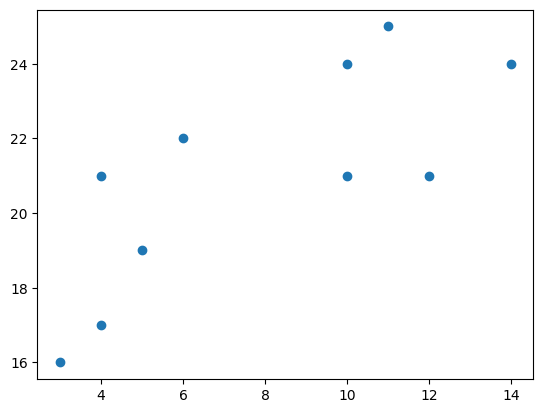

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

=== DATA YANG ADA ===
    x   y
0   4  21
1   5  19
2  10  24
3   4  17
4   3  16
5  11  25
6  14  24
7   6  22
8  10  21
9  12  21


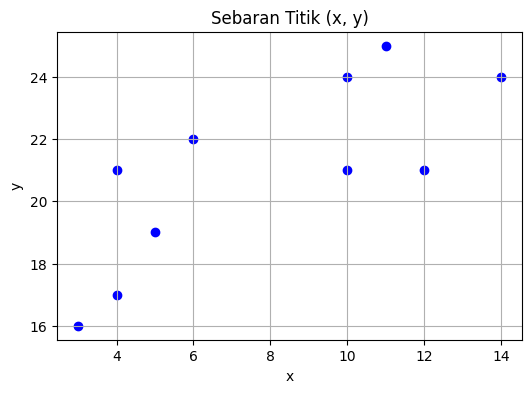

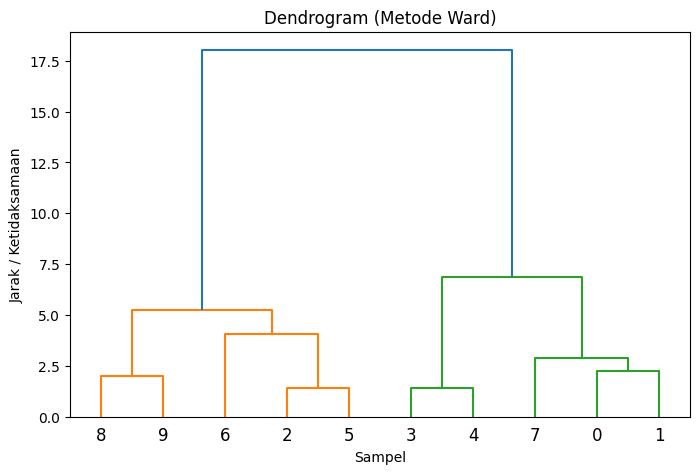


=== DATA + HASIL CLUSTER ===
    x   y  cluster
0   4  21        0
1   5  19        0
2  10  24        1
3   4  17        0
4   3  16        0
5  11  25        1
6  14  24        1
7   6  22        0
8  10  21        1
9  12  21        1


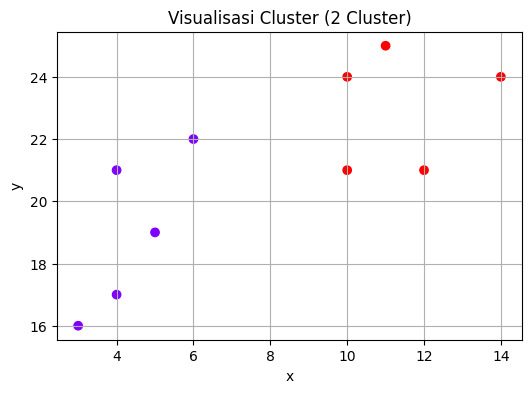

In [7]:
# ===========================================
# MENAMPILKAN DATA YANG ADA
# (Hierarchical Clustering - W3Schools versi lengkap)
# ===========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# -----------------------------
# 1) DATA YANG DIGUNAKAN
# -----------------------------
# Data terdiri dari 10 titik koordinat 2 dimensi (x, y)
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

# Gabungkan menjadi pasangan (x, y)
data = list(zip(x, y))

# -----------------------------
# 2) TAMPILKAN DATA DALAM BENTUK TABEL
# -----------------------------
df = pd.DataFrame(data, columns=["x", "y"])
print("=== DATA YANG ADA ===")
print(df)

# -----------------------------
# 3) VISUALISASI DATA
# -----------------------------
plt.figure(figsize=(6,4))
plt.scatter(x, y, color='blue')
plt.title("Sebaran Titik (x, y)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# -----------------------------
# 4) (Opsional) LIHAT STRUKTUR PENGGABUNGAN (DENDROGRAM)
# -----------------------------
Z = linkage(data, method='ward', metric='euclidean')
plt.figure(figsize=(8,5))
dendrogram(Z)
plt.title("Dendrogram (Metode Ward)")
plt.xlabel("Sampel")
plt.ylabel("Jarak / Ketidaksamaan")
plt.show()

# -----------------------------
# 5) (Opsional) KLASTERISASI UNTUK MELIHAT HASILNYA
# -----------------------------
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = cluster.fit_predict(data)

# Tambahkan hasil cluster ke tabel
df["cluster"] = labels
print("\n=== DATA + HASIL CLUSTER ===")
print(df)

# -----------------------------
# 6) VISUALISASI TITIK PER CLUSTER
# -----------------------------
plt.figure(figsize=(6,4))
plt.scatter(x, y, c=labels, cmap='rainbow')
plt.title("Visualisasi Cluster (2 Cluster)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


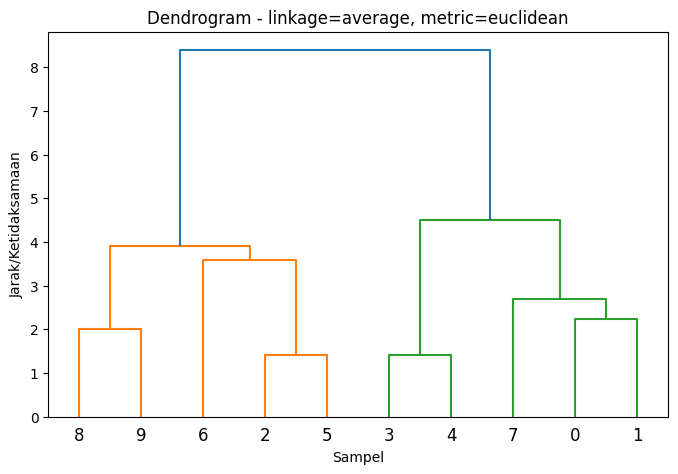

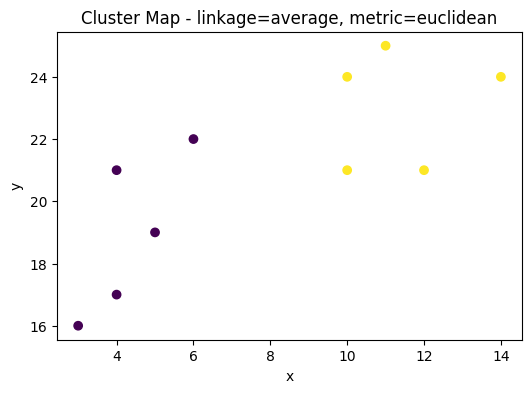

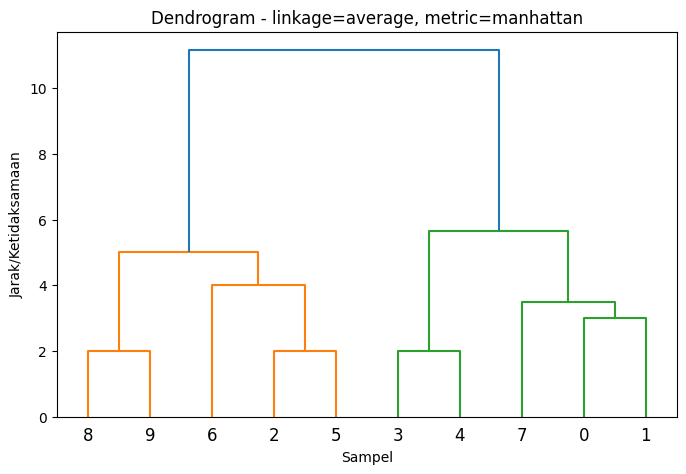

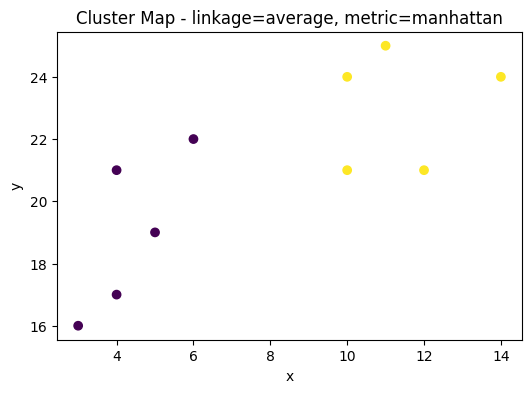

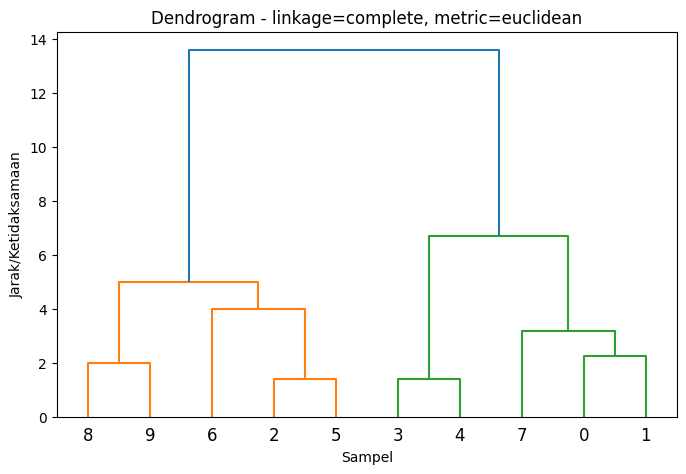

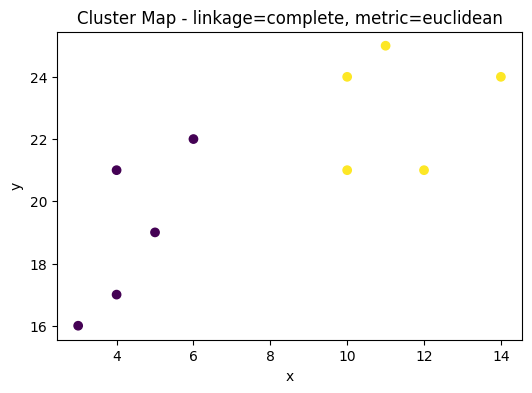

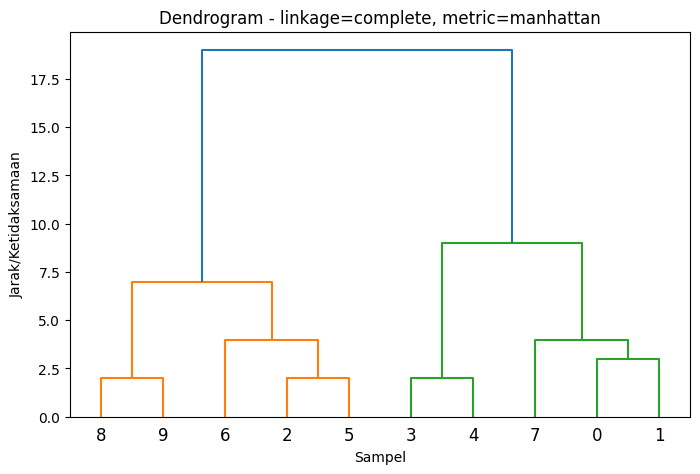

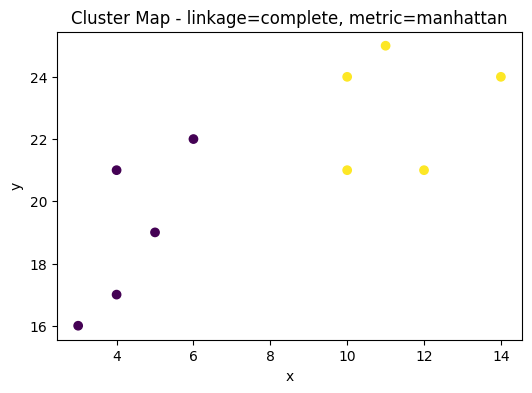

    linkage     metric                          labels cluster_sizes  \
0   average  euclidean  [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]  {0: 5, 1: 5}   
1   average  manhattan  [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]  {0: 5, 1: 5}   
2  complete  euclidean  [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]  {0: 5, 1: 5}   
3  complete  manhattan  [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]  {0: 5, 1: 5}   

   silhouette  
0      0.5639  
1      0.5813  
2      0.5639  
3      0.5813  


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# data
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
X = np.column_stack([x, y])

# helper: SciPy menyebut Manhattan sebagai 'cityblock'
def _scipy_metric_name(metric):
    return "cityblock" if metric == "manhattan" else metric

def run_hac(X, metric="euclidean", linkage_method="average", n_clusters=2):
    # dendrogram
    Z = linkage(X, method=linkage_method, metric=_scipy_metric_name(metric))
    # sklearn versi lama pakai 'affinity', versi baru 'metric'
    try:
        model = AgglomerativeClustering(n_clusters=n_clusters, affinity=metric, linkage=linkage_method)
    except TypeError:
        model = AgglomerativeClustering(n_clusters=n_clusters, metric=metric, linkage=linkage_method)
    labels = model.fit_predict(X)
    sil = silhouette_score(X, labels, metric=metric)
    return Z, labels, sil

cases = [
    ("average","euclidean"),
    ("average","manhattan"),
    ("complete","euclidean"),
    ("complete","manhattan"),
]

rows = []
for link, met in cases:
    Z, labels, sil = run_hac(X, metric=met, linkage_method=link, n_clusters=2)
    # dendrogram
    plt.figure(figsize=(8,5)); dendrogram(Z)
    plt.title(f"Dendrogram - linkage={link}, metric={met}"); plt.xlabel("Sampel"); plt.ylabel("Jarak/Ketidaksamaan"); plt.show()
    # scatter cluster
    plt.figure(figsize=(6,4)); plt.scatter(X[:,0], X[:,1], c=labels)
    plt.title(f"Cluster Map - linkage={link}, metric={met}"); plt.xlabel("x"); plt.ylabel("y"); plt.show()
    rows.append({
        "linkage": link, "metric": met,
        "labels": labels.tolist(),
        "cluster_sizes": dict(pd.Series(labels).value_counts().sort_index()),
        "silhouette": round(sil,4)
    })

print(pd.DataFrame(rows))
